<a href="https://colab.research.google.com/github/Sid2318/Diabates-Prediction-Basic-Logistic-Regression-/blob/main/Diabates_Prediction_logoistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

see the dataset head

see its shape

see if any missing values are there. if yes then handle them

plot graph and observe

describe and df.groupby('Outcome').mean()

standardize or do label encoding

train and test the data

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
#loading the dataset to a Pandas DataFrame
df = pd.read_csv('/content/diabetes.csv')

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
#to see how many rows and colunmns are there
df.shape

(768, 9)

In [42]:
#the number of missing values (NaN)
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


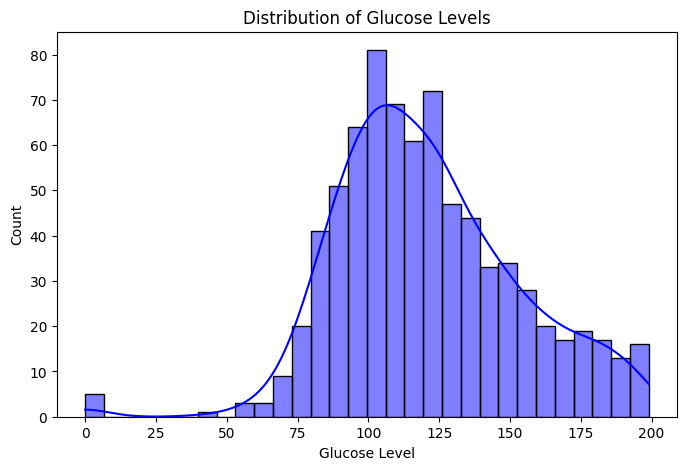

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(df['Glucose'], bins=30, kde=True, color='blue')
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()

<ipython-input-46-ba343e6f7fe4>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




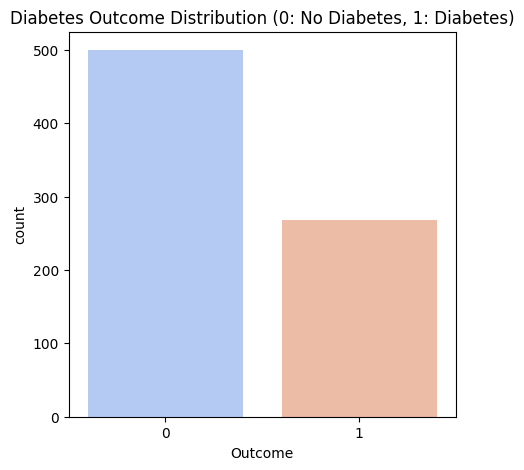

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Outcome'], palette='coolwarm')
plt.title("Diabetes Outcome Distribution (0: No Diabetes, 1: Diabetes)")
plt.show()

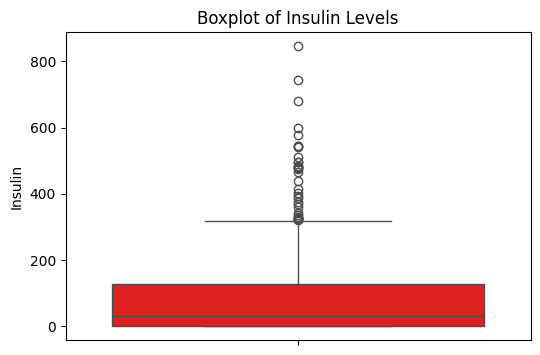

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Insulin'], color='red')
plt.title("Boxplot of Insulin Levels")
plt.show()

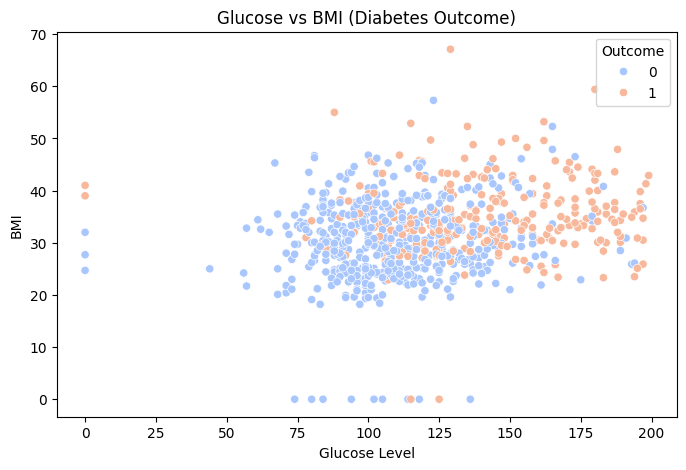

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Glucose'], y=df['BMI'], hue=df['Outcome'], palette="coolwarm")
plt.title("Glucose vs BMI (Diabetes Outcome)")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.show()

<ipython-input-49-f1e073b00f3a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




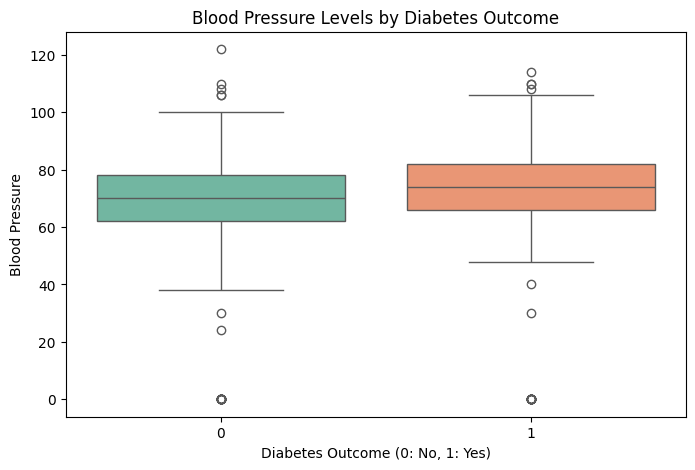

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Outcome'], y=df['BloodPressure'], palette="Set2")
plt.title("Blood Pressure Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0: No, 1: Yes)")
plt.ylabel("Blood Pressure")
plt.show()

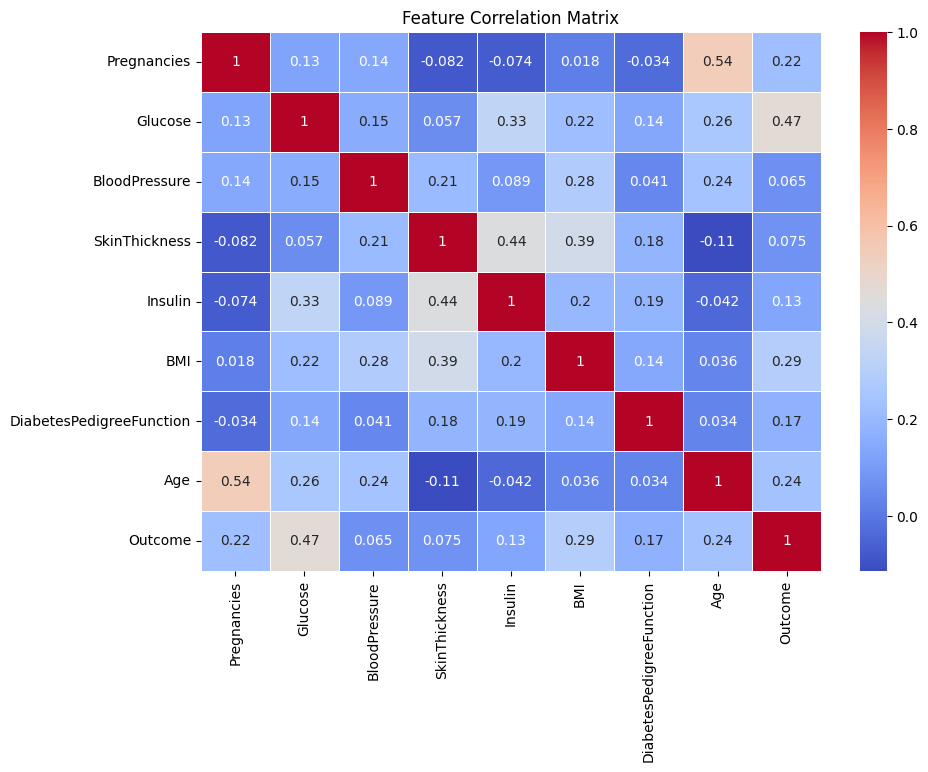

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [50]:
fig = px.scatter_3d(df, x='Glucose', y='BMI', z='Age', color='Outcome',
                    title="3D Scatter Plot - Glucose vs BMI vs Age")
fig.show()

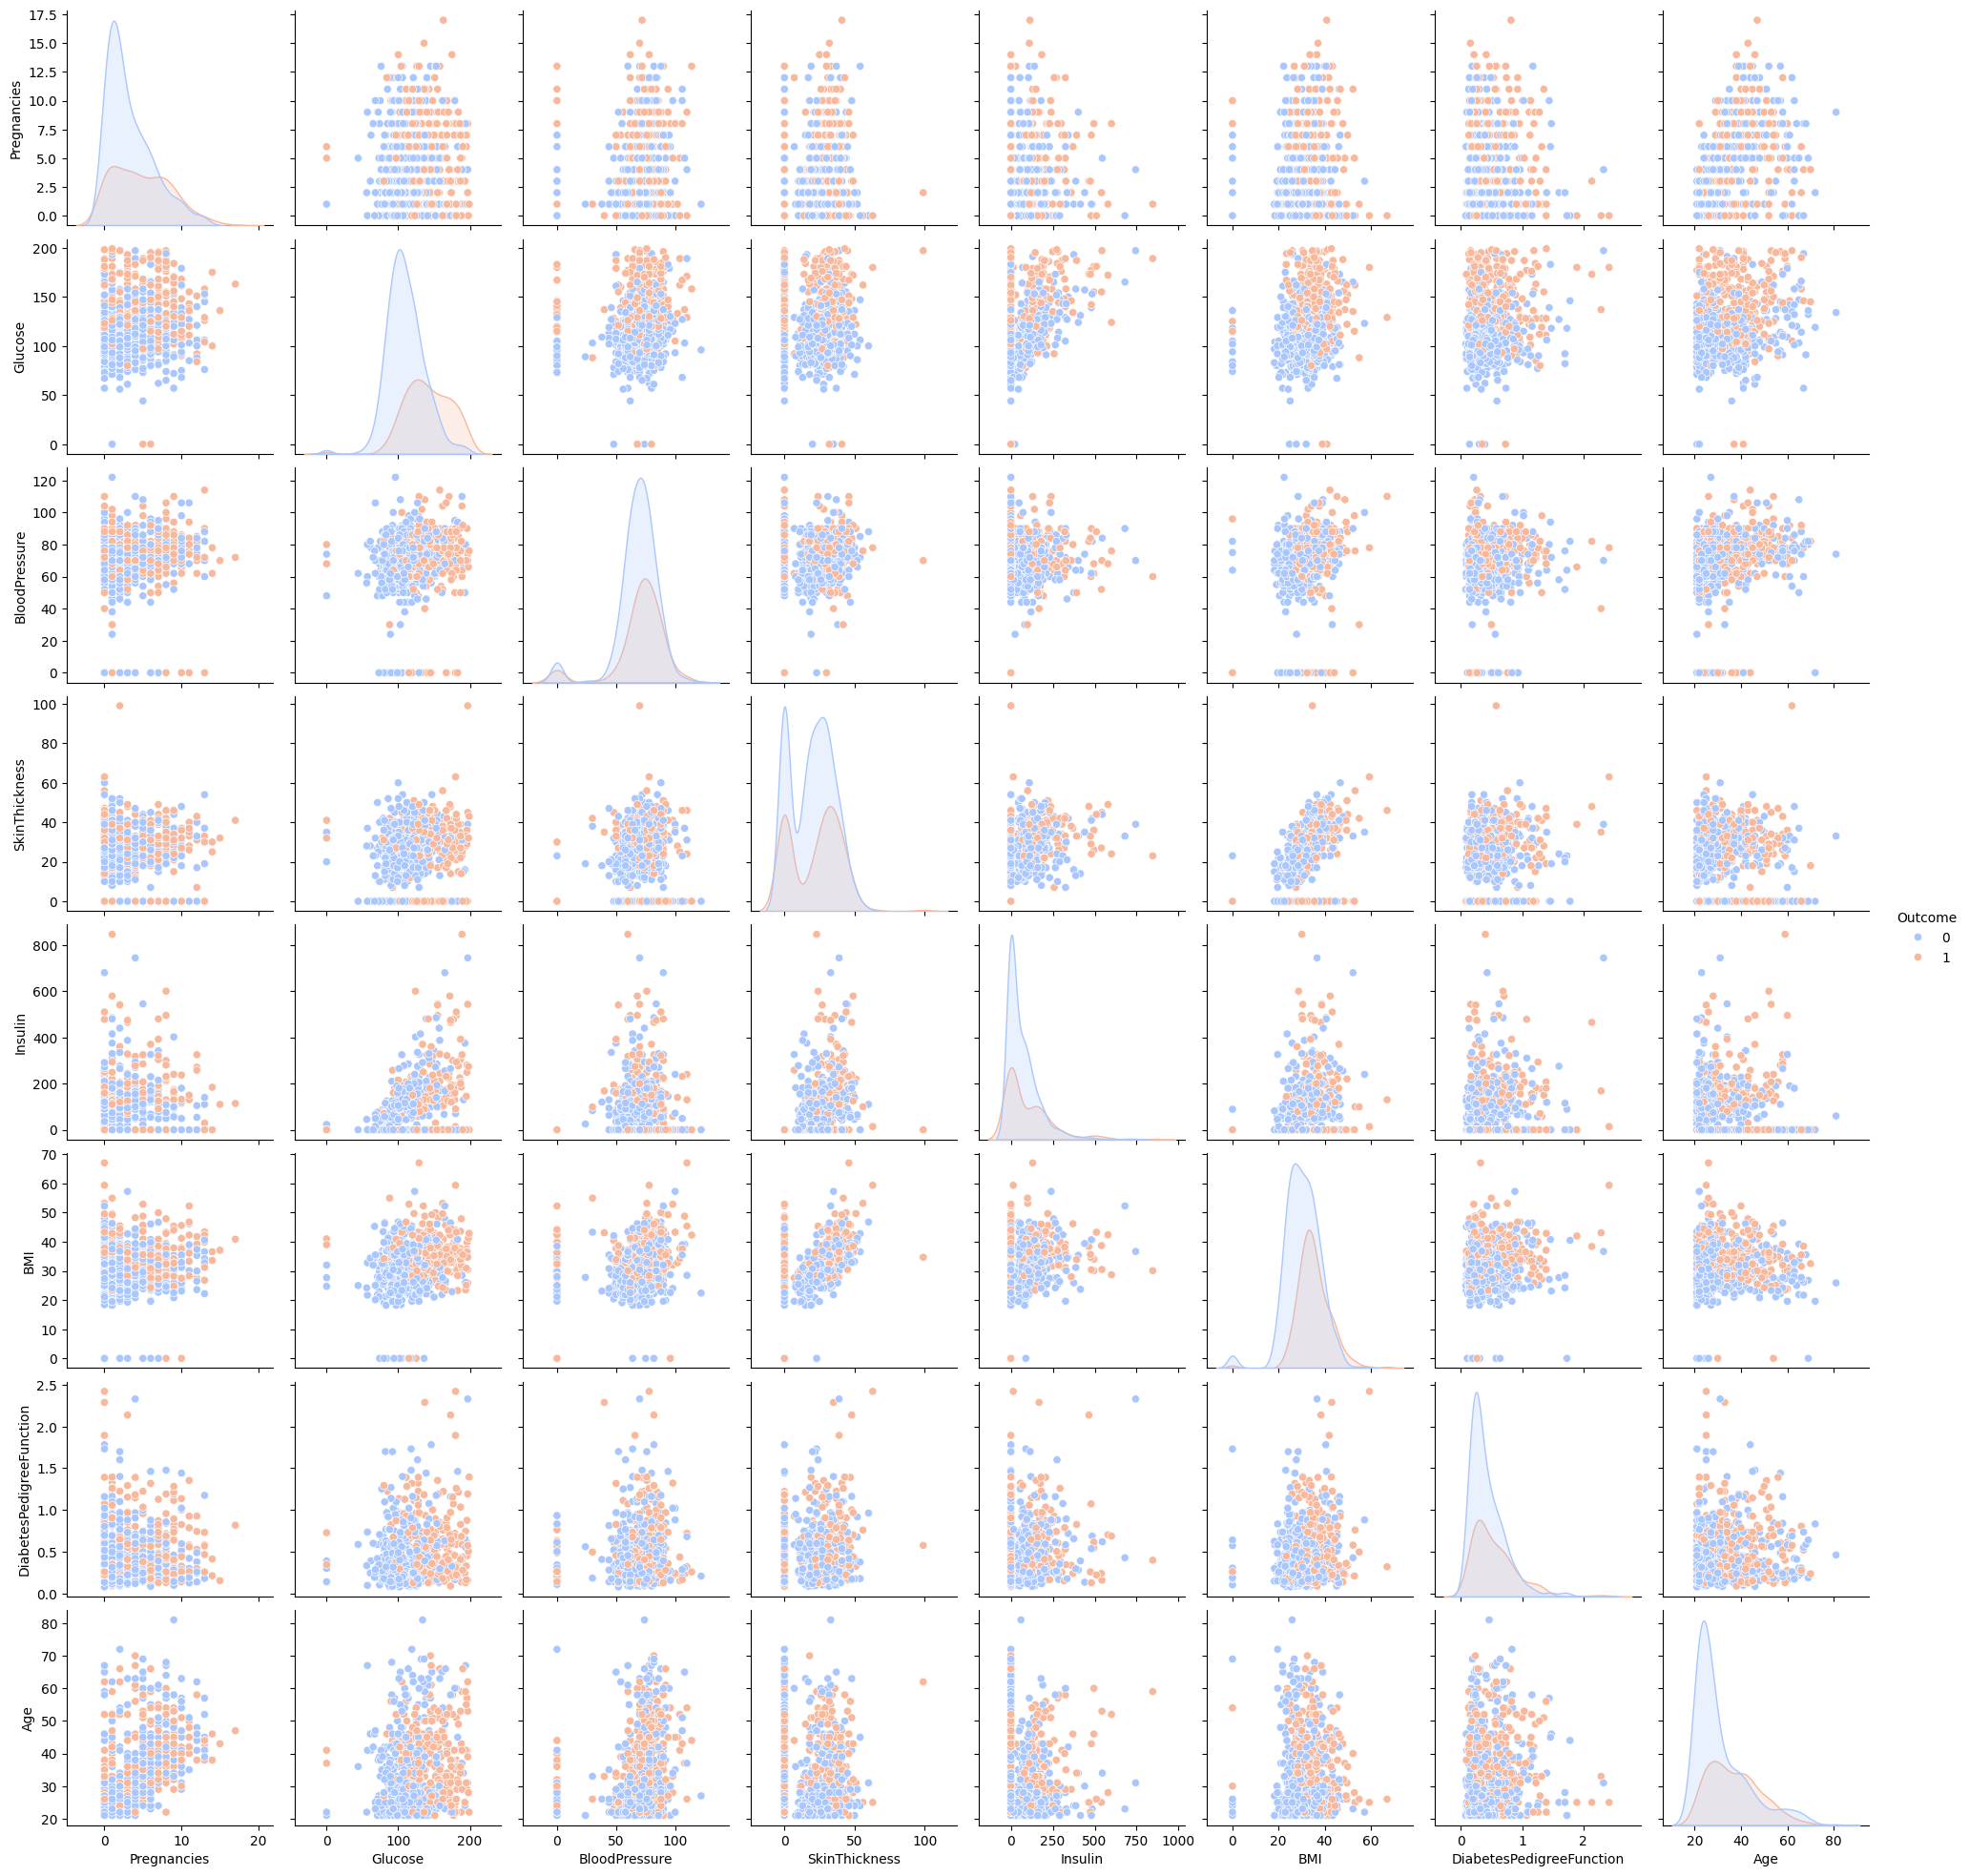

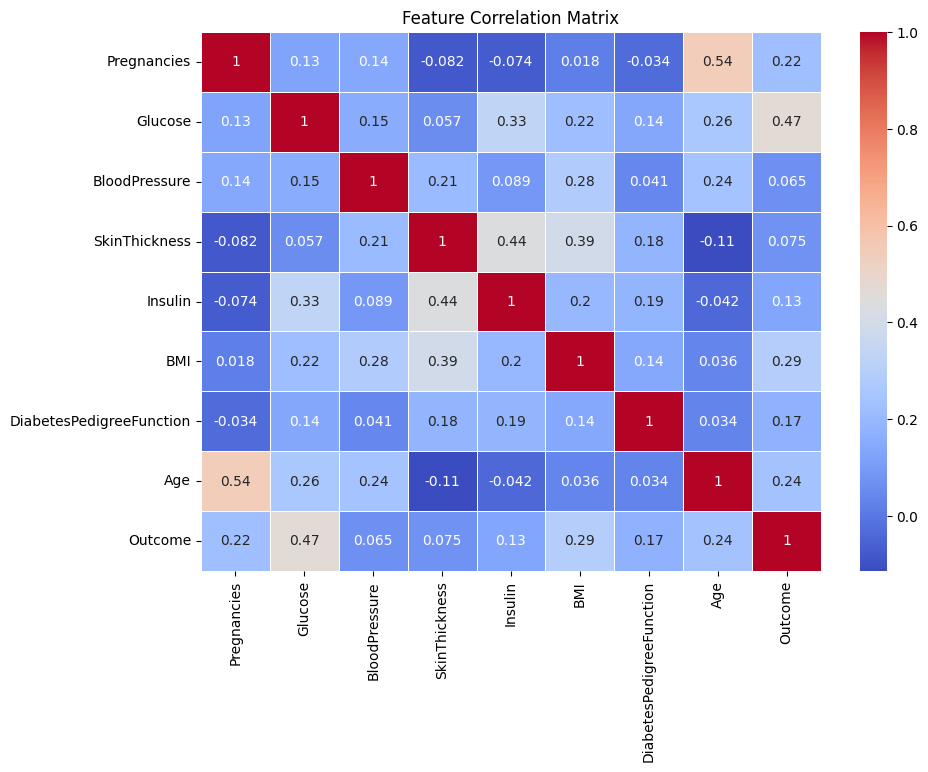

In [51]:
# Pairplot to check feature relationships
sns.pairplot(df, hue="Outcome", palette="coolwarm")
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [52]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [53]:
# 0 --> Non-Diabetic
# 1 --> Diabetic

In [54]:
#by this we will know what is the value difference for any thing
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [55]:
# separating the data and labels
features = df.drop(columns = 'Outcome', axis=1)
target = df['Outcome']

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit(features)

StandardScaler()

In [58]:
standardized_data = scaler.transform(features)

In [59]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [60]:
features = standardized_data
target = df['Outcome']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, stratify=target, random_state=2)

In [63]:
classifier = LogisticRegression()

In [64]:
classifier.fit(X_train, Y_train)

LogisticRegression()

In [65]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [66]:
training_data_accuracy

0.7850162866449512

In [67]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

Making Predictive System

In [68]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

